In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from pandas.plotting import scatter_matrix
import joblib 
import pickle 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 

In [2]:
data = pd.read_csv("iris.csv") 
data.head() 

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
data.shape

(150, 5)

In [4]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [7]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [8]:
data.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

### EDA

<Figure size 960x960 with 0 Axes>

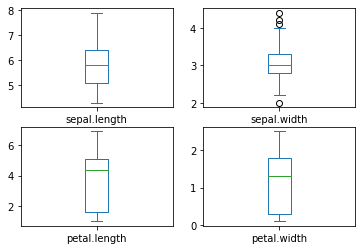

In [9]:
plt.figure(figsize=(12, 12), dpi=80)  
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False) 
plt.show() 

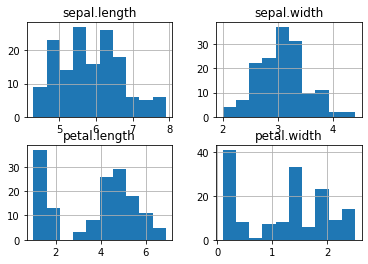

In [10]:
data.hist() 
plt.show() 

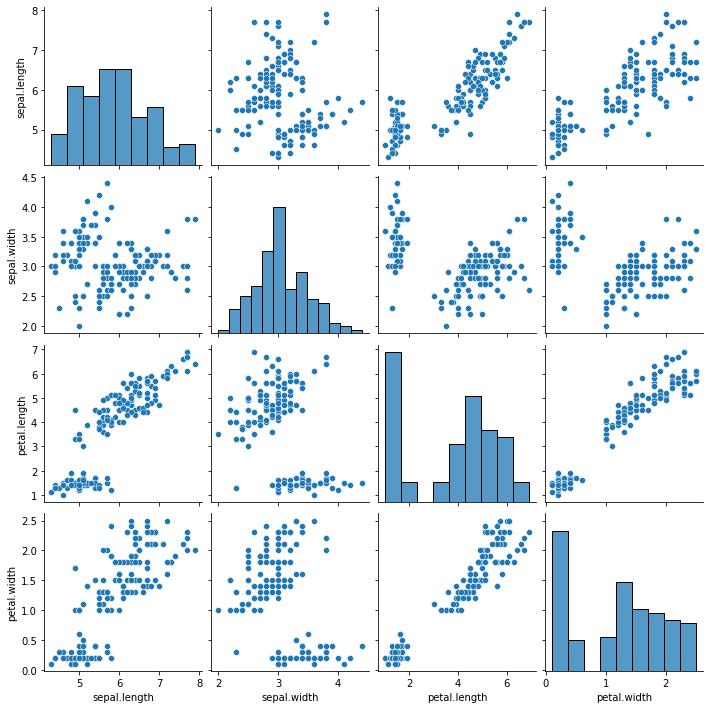

In [11]:
sns.pairplot(data)

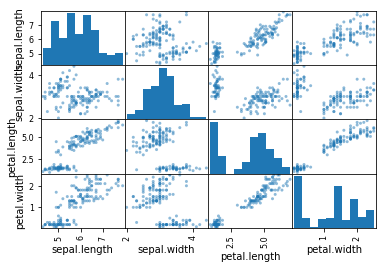

In [12]:
scatter_matrix(data) 
plt.show() 

<AxesSubplot:>

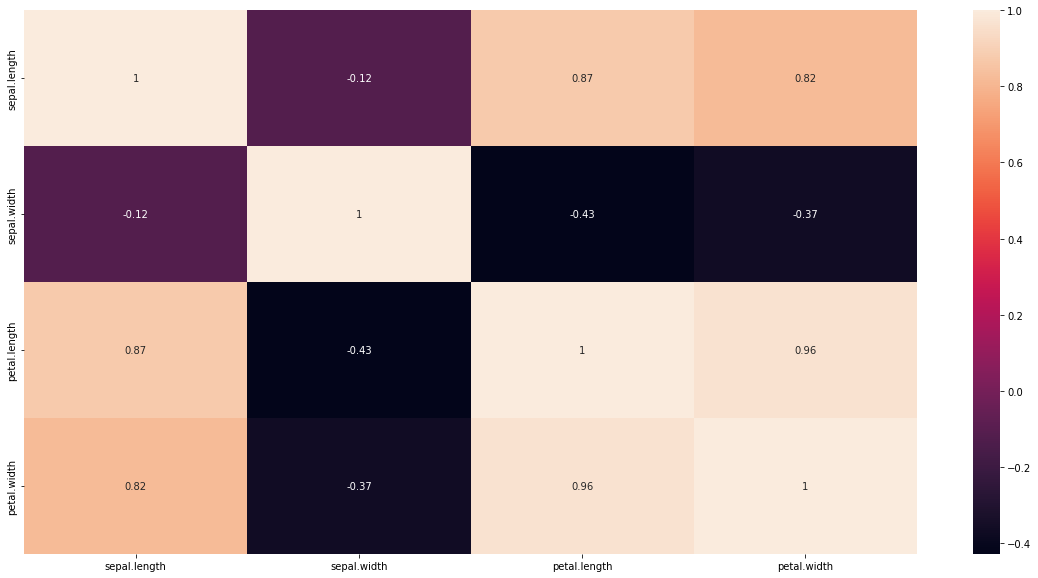

In [13]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True) 

<AxesSubplot:xlabel='variety', ylabel='count'>

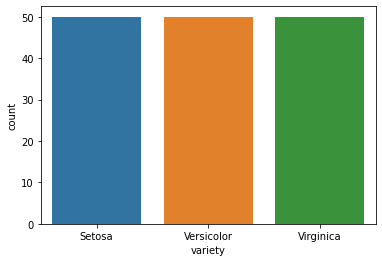

In [14]:
sns.countplot(x='variety', data=data)

### Machine Learning Models

In [15]:
data_array = data.values 
X = data_array[:, 0:4] 
y = data_array[:, 4]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42) 


### Logistic Regression

In [17]:
logistic_model = LogisticRegression(random_state=0) 
logistic_model.fit(x_train, y_train) 

LogisticRegression(random_state=0)

In [18]:
y_predict = logistic_model.predict(x_test)
y_predict 

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

<AxesSubplot:>

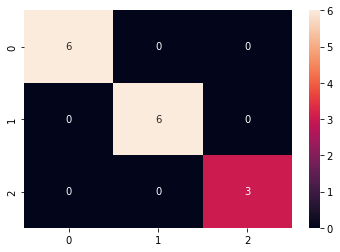

In [19]:
cm = confusion_matrix(y_test, y_predict) 
sns.heatmap(cm, annot=True) 

In [20]:
print(classification_report(y_test, y_predict)) 

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         6
  Versicolor       1.00      1.00      1.00         6
   Virginica       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [21]:
print("Accuracy is :", logistic_model.score(x_test, y_test)) 

Accuracy is : 1.0


### Predicting with totally new data

In [22]:
def predict_with_new_data(new_data, model):
    new_data_reshape = new_data.reshape(1, -1) 
    new_pred = model.predict(new_data_reshape)
    return new_pred 

new_data = np.array([4.6, 3.0, 1.3, 0.2]) 
prediction = predict_with_new_data(new_data, logistic_model)    
prediction 

array(['Setosa'], dtype=object)

### Saving and Loading the Model

In [23]:
# Saving model
file_name = "/home/moni/Desktop/irish_deployment/logistic_model.sav" 
pickle.dump(logistic_model, open(file_name, 'wb'))  

# Loading model 
loaded_model = pickle.load(open(file_name, 'rb')) 
result = loaded_model.score(x_test, y_test) 
result 

1.0

### Using KNN, Decision Tree, and SVM models 

In [24]:
# knn without parameter 
knn = KNeighborsClassifier() 
knn.fit(x_train, y_train) 
knn_y_pred = knn.predict(x_test) 
print("Accuracy :", knn.score(x_test, y_test)) 

Accuracy : 1.0


In [25]:
# knn with simple parameter 
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 
knn.fit(x_train, y_train) 
knn_y_pred = knn.predict(x_test) 
print("Accuracy :", knn.score(x_test, y_test))  

Accuracy : 1.0


In [26]:
# Again knn with simple parameter 
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train) 
knn_y_pred = knn.predict(x_test) 
print("Accuracy :", knn.score(x_test, y_test))  

Accuracy : 1.0


In [27]:
# for multiple n_neighbors value 
def multiple_n_neighbor(neighbor, x_train, y_train): 
    mean_acc = np.zeros(neighbor -1) 
    std_acc = np.zeros(neighbor -1) 
    c_matrix = [] 

    for n in range(1, neighbor): 
        knn_model = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train) 
        knn_model_y_pred = knn_model.predict(x_test) 
        mean_acc[n-1] = accuracy_score(y_test, knn_model_y_pred) 

        std_acc[n-1] = np.std(knn_model_y_pred == y_test) / np.sqrt(knn_model_y_pred.shape[0]) 

    return neighbor, mean_acc, std_acc 


neighbor, mean_acc, std_acc = multiple_n_neighbor(10, x_train, y_train) 
mean_acc 

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.93333333, 1.        , 1.        ])

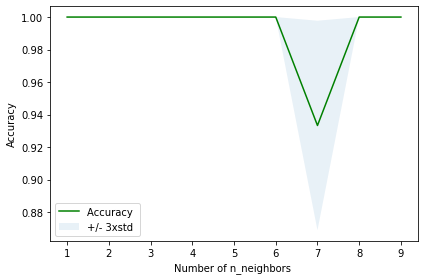

In [28]:
plt.plot(range(1, neighbor), mean_acc, 'g') 
plt.fill_between(range(1, neighbor), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10) 
plt.legend(("Accuracy ", "+/- 3xstd")) 
plt.ylabel('Accuracy') 
plt.xlabel("Number of n_neighbors ") 
plt.tight_layout() 
plt.show() 

In [29]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 1.0 with k= 1


In [30]:
knn = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)
knn_y_pred = knn.predict(x_test) 

print("Train set accuracy :", accuracy_score(y_train, knn.predict(x_train))) 
print("Test set accuracy :", accuracy_score(y_test, knn_y_pred)) 

Train set accuracy : 1.0
Test set accuracy : 1.0


In [31]:
# Saving KNN model 
file_name = "/home/moni/Desktop/irish_deployment/knn_model.sav" 
joblib.dump(knn, open(file_name, 'wb'))  

### Using Decision Tree

In [32]:
d_tree = DecisionTreeClassifier() 
d_tree.fit(x_train, y_train) 

print("Accuracy :", d_tree.score(x_test, y_test)) 

Accuracy : 1.0


In [33]:
# Saving d_tree model 
file_name = "/home/moni/Desktop/irish_deployment/d_tree_model.sav" 
joblib.dump(knn, open(file_name, 'wb'))  

### Using Support Vector Classifier

In [34]:
svm = SVC().fit(x_train, y_train) 
svm_y_pred = svm.predict(x_test) 

print("Accuracy :", svm.score(x_test, y_test)) 

Accuracy : 1.0


In [35]:
# Saving svm model 
file_name = "/home/moni/Desktop/irish_deployment/svm_model.sav" 
joblib.dump(svm, open(file_name, 'wb'))   